In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

# Importing the dataset by giving the path and displaying first 10 values
df = pd.read_csv(r"C:\Users\PHIL\Desktop\Loan_prediction\loan_train.csv")
df.tail(20) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
# Obtaining all the information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Checking rows and Columns of dataset

df.shape

(614, 13)

In [5]:
# checking the existance of Null values in each column

df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [6]:
# checking the existance of Null values in each column

df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
# Checking the number of Null Values in each column

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# A way to get info of a particular column

df[['Gender']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  601 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [9]:
# To check the number of outcomes in a particular column (Represented in form of array)

df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [10]:
# Count of occurance of each outcome of a column

df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
# This method is the fastest way to clean the data but it has a disadvantage of loosing important data

df_loan = df.dropna()
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# DATA PROCESSING

# All Non-null values are replaced by digit 1 in Dependents column.. So it has 0 Null-values now

df['Dependents'].fillna(1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# All null values in LoanAmount section is filled by the mean value of its own column to obtain 614 Non-null values

df['LoanAmount'].fillna(df.LoanAmount.mean(),inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [16]:
# Creating a duplicate column of a column with binary outcomes in character form and appending it in the table as shown.  

Value_Mapping = {'Yes' : 1, 'No' : 0}
df['Married_Section'] = df['Married'].map(Value_Mapping)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0


In [17]:
# Creating a duplicate column of a column with binary outcomes in character form and appending it in the table as shown.

Value_Mapping1 = {'Male' : 1, 'Female' : 0}
df['Gender_Section'] = df['Gender'].map(Value_Mapping1)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0


In [18]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [19]:
# Creating a duplicate column of a column with binary outcomes in character form and appending it in the table as shown.

Value_Mapping2 = {'Graduate' : 1, 'Not Graduate' : 0}
df['Edu_Section'] = df['Education'].map(Value_Mapping2)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    611 non-null    float64
 14  Gender_Section     601 non-null    float64
 15  Edu_Section        614 non-null    int64  
dtypes: float64(6), int64(2), o

In [21]:
# Filling all the empty spaces of the following columns having binary outcomes in integer form.

df["Married_Section"].fillna(df.Married_Section.mean(),inplace=True) 

df["Gender_Section"].fillna(df.Gender_Section.mean(),inplace=True)

df["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.mean(),inplace=True)

df["Credit_History"].fillna(df.Credit_History.mean(),inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    614 non-null    float64
 14  Gender_Section     614 non-null    float64
 15  Edu_Section        614 non-null    int64  
dtypes: float64(6), int64(2), o

In [22]:
# Creating a duplicate column of a column with binary outcomes in character form and appending it in the table as shown.

Value_Mapping3 = {'Yes' : 1, 'No' : 0}
df['Employed_Section'] = df['Self_Employed'].map(Value_Mapping3)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0,0.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    614 non-null    float64
 14  Gender_Section     614 non-null    float64
 15  Edu_Section        614 non-null    int64  
 16  Employed_Section   582 non

In [24]:
df["Employed_Section"].fillna(df.Employed_Section.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    614 non-null    float64
 14  Gender_Section     614 non-null    float64
 15  Edu_Section        614 non-null    int64  
 16  Employed_Section   614 non

In [25]:
# Filling the empty spaces of the column having more than 2 outcomes in character form.

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Property_Section"] = lb_make.fit_transform(df["Property_Area"])
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section,Property_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1,0.0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,1.0,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0,0.0,2
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2


In [26]:
Value_Mapping4 = {'Y' : 1, 'N' : 0}
df['Loan_Section'] = df['Loan_Status'].map(Value_Mapping4)
df.head(5)

# Dependents Column is not used in data representation and algorithm implementation

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section,Property_Section,Loan_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1,0.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0,0.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2,1


C:\Users\PHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


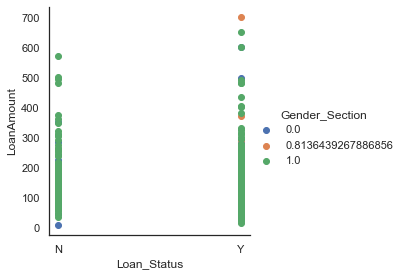

In [27]:
# DATA REPRESENTATION

# Using SCATTER REPRESENTATION
# Imported libraries... x-axis: loan_status, y_axis: Loan_Amount and representing in terms of Gender_Section

sns.FacetGrid(df,hue="Gender_Section",size=4) \
.map(plt.scatter,"Loan_Status","LoanAmount") \
.add_legend()
plt.show()  

C:\Users\PHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


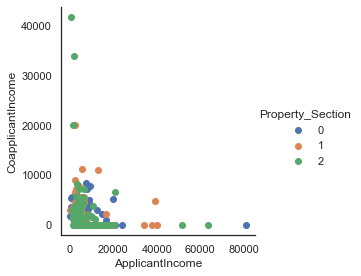

In [28]:
# x-axis: ApplicationIncome, y_axis: CoapplicantIncome and representing in terms of Property_Section

sns.FacetGrid(df,hue="Property_Section",size=4) \
.map(plt.scatter,"ApplicantIncome","CoapplicantIncome") \
.add_legend()
plt.show()  

Text(0, 0.5, 'Count')

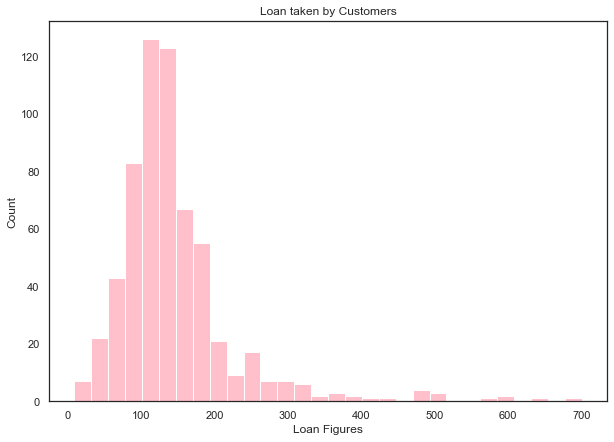

In [29]:
# Using HISTOGRAM REPRESENTATION
# x-axis: loan figures, y_axis: count, Title: Loan taken by Customers

plt.figure(figsize = (10,7)) 
x = df["LoanAmount"] 
plt.hist(x, bins = 30, color = "pink") 
plt.title("Loan taken by Customers") 
plt.xlabel("Loan Figures") 
plt.ylabel("Count") 

<AxesSubplot:xlabel='Property_Area', ylabel='Gender_Section'>

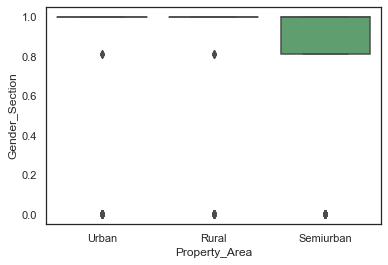

In [30]:
#USING BOXPLOT REPRESENTATION
# x-axis: Property_Area with 3 types of outcomes, y-axis: Gender_Section with 3 types of outcomes

sns.boxplot(x="Property_Area", y="Gender_Section", data=df)

<AxesSubplot:xlabel='Married_Section', ylabel='ApplicantIncome'>

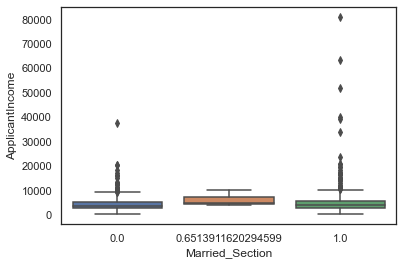

In [31]:
# x-axis: Married_Section with 3 types of outcomes, y-axis: ApplicantIncome with all outcomes

sns.boxplot(x="Married_Section", y="ApplicantIncome", data=df)

<AxesSubplot:>

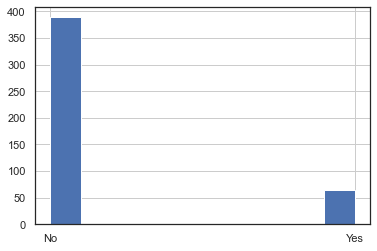

In [32]:
df_temp=df[df["Education"]== "Graduate"]
df_temp["Self_Employed"].hist()

C:\Users\PHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


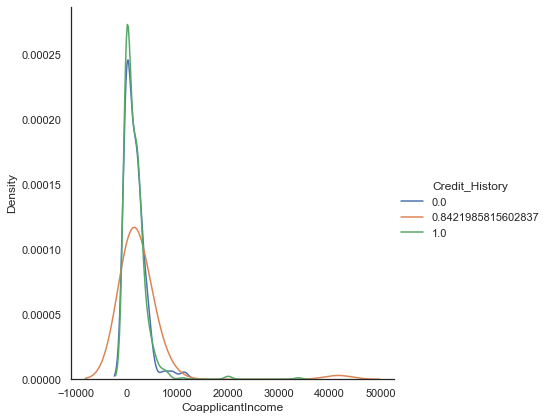

In [33]:
sns.FacetGrid(df, hue="Credit_History", size=6).map(sns.kdeplot, "CoapplicantIncome").add_legend()

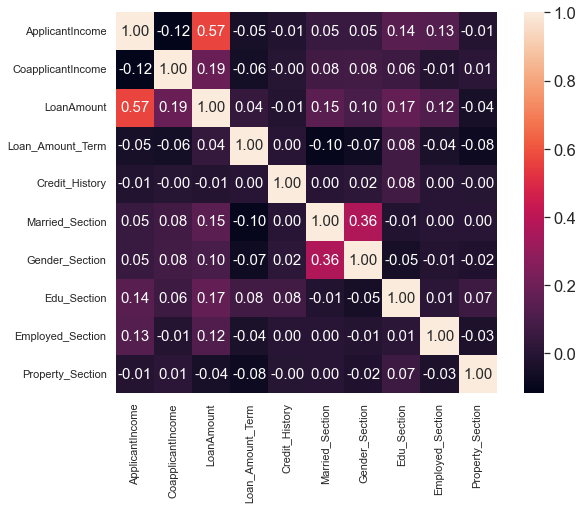

In [34]:
# Correlation Matrix

# Correlation Matrix of the columns given below

cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married_Section',
        'Gender_Section','Edu_Section','Employed_Section','Property_Section']
f, ax = plt.subplots(figsize=(10, 7))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [36]:
# Algorithm Implementation

# Logistic Reggression

# Importing Libraries and classes

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
# X is the input and Y is the output

X=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married_Section',
        'Gender_Section','Edu_Section','Employed_Section','Property_Section']].values
y=df[["Loan_Section"]].values

In [38]:
# Importing Libraries and classes
# Dividing the data in 7:3 Ratio for Training and Testing respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Training the Model

model.fit(X_train,y_train)

C:\Users\PHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Training Accuracy

model.score(X_train,y_train)

0.8018648018648019

In [41]:
#Testing Accuracy

model.score(X_test,y_test)

0.8324324324324325

In [44]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expected Output for the 
# corresponding Inputs.

expected = y_test
predicted = model.predict(X_test)

In [43]:
# Importing Libraries and class 

from sklearn import metrics

In [45]:
#  Printing the Report

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185



In [46]:
# Support Vector Machine

# Importing class and libraries

from sklearn.svm import SVC
model = SVC()

In [47]:
# Training the Model

model.fit(X_train,y_train)

C:\Users\PHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [48]:
# Accuracy of the model in training

model.score(X_train,y_train)

0.675990675990676

In [49]:
# Accuracy of the model in Testing

model.score(X_test,y_test)

0.7243243243243244

In [51]:
# Importing Libraries and Classes

from sklearn import metrics

In [52]:
# Obtaining Report

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185



In [53]:
# Output in the form of count

print(metrics.confusion_matrix(expected, predicted))

[[ 23  28]
 [  3 131]]


In [54]:
# Random Forest

Importing libraries and classes

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [55]:
# Training the model

model.fit(X_train,y_train)

C:\Users\PHIL\AppData\Local\Temp\ipykernel_10080\3787036816.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [56]:
# Accuracy in training the model

model.score(X_train,y_train)

1.0

In [57]:
#Accuracy in testing the model

model.score(X_test,y_test)

0.8108108108108109

In [58]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expected Output for the 
# corresponding Inputs.

expected = y_test
predicted = model.predict(X_test)

In [59]:
# Generating Report

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.75      0.47      0.58        51
           1       0.82      0.94      0.88       134

    accuracy                           0.81       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.80      0.81      0.80       185



In [60]:
# Output in the form of Matrix

print(metrics.confusion_matrix(expected, predicted))

[[ 24  27]
 [  8 126]]


In [61]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [62]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
model.score(X_train,y_train)

1.0

In [64]:
model.score(X_test,y_test)

0.7081081081081081

In [65]:
expected = y_test
predicted = model.predict(X_test)

In [66]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46        51
           1       0.79      0.81      0.80       134

    accuracy                           0.71       185
   macro avg       0.63      0.63      0.63       185
weighted avg       0.70      0.71      0.71       185



In [67]:
print(metrics.confusion_matrix(expected, predicted))

[[ 23  28]
 [ 26 108]]


In [8]:
df.shape

(614, 13)